In [4]:
import pandas as pd
m=pd.read_csv (r'C:\Users\Vaishnav\Documents\investment Management using python\data\Portfolios_Formed_on_ME_monthly_EW.csv' , header = 0, index_col =0, parse_dates=True, na_values=-99.99)

In [5]:
rets = m[['Lo 30','Hi 30']]
rets.columns=['SmallCap','LargeCap']
rets

,SmallCap,LargeCap
192607,-0.43,2.68
192608,3.90,2.09
192609,-1.08,0.16
192610,-3.32,-3.06
192611,-0.46,3.09
...,...,...
201808,3.47,2.87
201809,-2.24,0.08
201810,-10.76,-7.63
201811,-2.08,2.19


In [6]:
rets=rets/100

In [7]:
rets.head()

,SmallCap,LargeCap
192607,-0.0043,0.0268
192608,0.0390,0.0209
192609,-0.0108,0.0016
192610,-0.0332,-0.0306
192611,-0.0046,0.0309


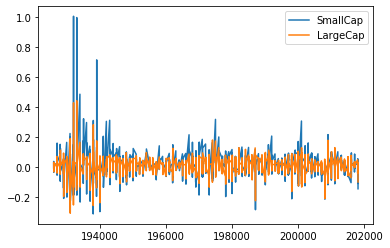

In [8]:
rets.plot()

In [9]:
rets.index=pd.to_datetime(rets.index,format="%Y%m")

In [10]:
rets.head()

,SmallCap,LargeCap
1926-07-01,-0.0043,0.0268
1926-08-01,0.0390,0.0209
1926-09-01,-0.0108,0.0016
1926-10-01,-0.0332,-0.0306
1926-11-01,-0.0046,0.0309


In [11]:
rets.index = rets.index.to_period('M')

In [12]:
rets.head

<bound method NDFrame.head of          SmallCap  LargeCap
1926-07   -0.0043    0.0268
1926-08    0.0390    0.0209
1926-09   -0.0108    0.0016
1926-10   -0.0332   -0.0306
1926-11   -0.0046    0.0309
...           ...       ...
2018-08    0.0347    0.0287
2018-09   -0.0224    0.0008
2018-10   -0.1076   -0.0763
2018-11   -0.0208    0.0219
2018-12   -0.1428   -0.0976

[1110 rows x 2 columns]>

In [13]:
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

In [14]:
def drawdown(return_series:pd.Series):
    '''Takes a time series of asset return
    computers & returns a dataframe that contails:
    The wealth peaks,the previous peaks,percent drawdowns '''
    wealth_index=1000*(1+return_series).cumprod()
    previous_peaks= wealth_index.cummax()
    drawdowns =(wealth_index-previous_peaks)/previous_peaks
    return pd.DataFrame({"wealth": wealth_index,
                         "Peaks": previous_peaks,
                         "Drawdown": drawdowns
                         })


In [15]:
rets.head()

,SmallCap,LargeCap
1926-07,-0.0043,0.0268
1926-08,0.0390,0.0209
1926-09,-0.0108,0.0016
1926-10,-0.0332,-0.0306
1926-11,-0.0046,0.0309


In [16]:
drawdown(rets['LargeCap']).head()

,wealth,Peaks,Drawdown
1926-07,1026.800000,1026.800000,0.000000
1926-08,1048.260120,1048.260120,0.000000
1926-09,1049.937336,1049.937336,0.000000
1926-10,1017.809254,1049.937336,-0.030600
1926-11,1049.259560,1049.937336,-0.000646


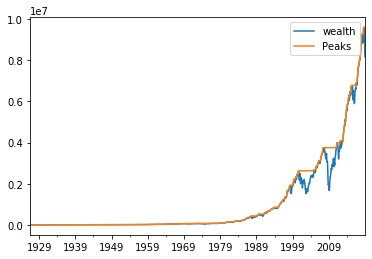

In [17]:
drawdown(rets['LargeCap'])[["wealth","Peaks"]].plot()

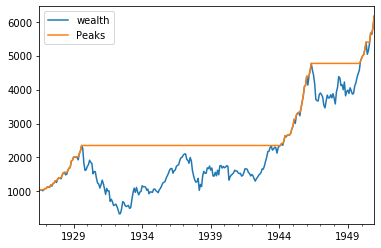

In [18]:
drawdown(rets[:"1950"]['LargeCap'])[["wealth","Peaks"]].plot()

In [52]:
drawdown(rets['LargeCap'])[["Drawdown"]].min()

Drawdown   -0.856944
dtype: float64

In [53]:
drawdown(rets['LargeCap'])[["Drawdown"]].idxmin()

Drawdown    1932-05
dtype: period[M]

In [55]:
drawdown(rets["1970":]['LargeCap'])[["Drawdown"]].idxmin()

Drawdown    2009-02
dtype: period[M]

In [57]:
drawdown(rets["1970":]['SmallCap'])[["Drawdown"]].idxmin()

Drawdown    1974-12
dtype: period[M]

In [58]:
drawdown(rets["1970":]['LargeCap'])[["Drawdown"]].min()

Drawdown   -0.554551
dtype: float64

In [19]:
drawdown(rets["1970":]['SmallCap'])[["Drawdown"]].min()

Drawdown   -0.617924
dtype: float64